Found 368 files belonging to 2 classes.


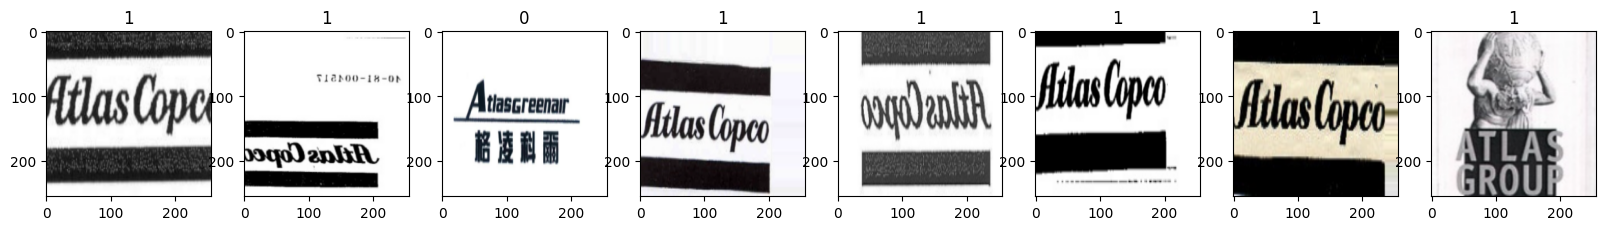

In [5]:
# Import necessary libraries
import tensorflow as tf  # Import TensorFlow for deep learning operations
import os               # Import OS for file and directory operations
import numpy as np     # Import NumPy for numerical operations
from matplotlib import pyplot as plt  # Import Matplotlib for data visualization

# Load image data from the 'data' directory using TensorFlow's image_dataset_from_directory function
data = tf.keras.utils.image_dataset_from_directory('augmented')

# Create an iterator to iterate through the data
data_iterator = data.as_numpy_iterator()

# Get a batch of data from the iterator
batch = data_iterator.next()

# Check the length of the batch
len(batch)

# Display the labels of the batch (0 for fake, 1 for real)
batch[1]

# Create a figure with 8 subplots for displaying sample images
fig, ax = plt.subplots(ncols=8, figsize=(20, 20))

# Loop through the first 8 images in the batch and display them along with their labels
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [6]:
# Scale the image data by dividing it by 255 to normalize pixel values
scaled = batch[0]
data = data.map(lambda x, y: (x / 255, y))

# Check the maximum pixel value in the normalized data
data.as_numpy_iterator().next()[0].max()

# Get the total number of samples in the dataset
len(data)

# Split the dataset into training, validation, and test sets based on specified proportions
train_size = int(len(data) * 0.7) + 1  # 70% for training
val_size = int(len(data) * 0.2)        # 20% for validation
test_size = int(len(data) * 0.1)       # 10% for testing

# Check the sum of sizes for verification
val_size + train_size + test_size

# Create training, validation, and test datasets using the split sizes
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [7]:
def create_model():
    from tensorflow.keras.applications import ResNet50
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Flatten

    # Load the ResNet50 model with weights pre-trained on ImageNet
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

    # Freeze the base model layers to prevent training on them
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers on top of the pre-trained model
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
    return model

In [8]:
model = create_model() 
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 8, 8, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      33,554,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,142,657 (217.98 MB)

 Trainable params: 33,554,945 (128.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5962 - loss: 11.6006 - val_accuracy: 0.5156 - val_loss: 10.2798
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6692 - loss: 5.0722 - val_accuracy: 0.2812 - val_loss: 3.0811
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5399 - loss: 1.6061 - val_accuracy: 0.8125 - val_loss: 0.4712
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7716 - loss: 0.5922 - val_accuracy: 0.8281 - val_loss: 0.5071
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8297 - loss: 0.4478 - val_accuracy: 0.8438 - val_loss: 0.3974
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.8576 - loss: 0.3375 - val_accuracy: 0.9219 - val_loss: 0.1853
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.8691 - loss: 0.3198 - val_accuracy: 0.8906 - val_loss: 0.3060
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.8826 - loss: 0.2829 - val_accuracy: 0.8438 - val_loss: 0.3968
Epoch 

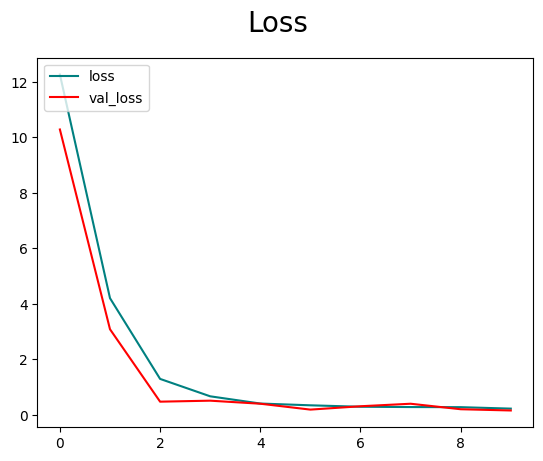

In [10]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

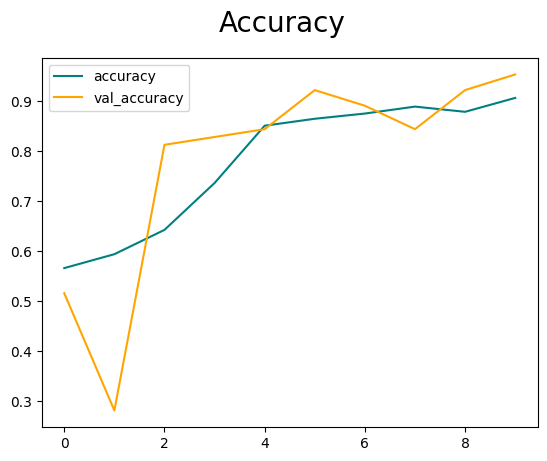

In [11]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Precision: 0.8889
Recall: 0.8000
F1 Score: 0.8421
Accuracy: 0.8125


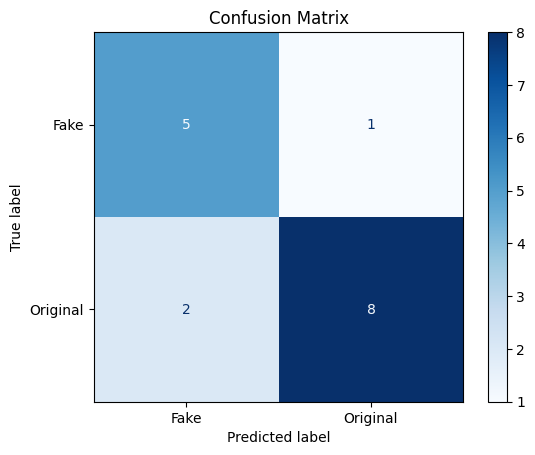

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Function to calculate precision, recall, f1 score, and accuracy
def evaluate_model(model, test_data):
    # Predict on the test data
    y_pred = []
    y_true = []
    
    for images, labels in test_data:
        preds = model.predict(images)
        y_pred.extend(np.round(preds).flatten())  # Round the predictions to the nearest integer (0 or 1)
        y_true.extend(labels.numpy().flatten())  # Flatten the true labels

    # Calculate precision, recall, f1 score, and accuracy
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    
    # Return the predictions and true labels for further use
    return y_true, y_pred

# Evaluate the model
y_true, y_pred = evaluate_model(model, test)

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Original'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [14]:
import tensorflow as tf
model = create_model()
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpt_ekucjo\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpt_ekucjo\assets


Saved artifact at 'C:\Users\ASUS\AppData\Local\Temp\tmpt_ekucjo'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_545')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1541517933840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1541517933264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1541517934416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1541517934224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1541517933648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1541517933072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1541517929616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1541517928464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1541517928080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1541517930000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  15

In [13]:
model = create_model()
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])


# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.h5')

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.5058 - loss: 20.6451 - val_accuracy: 0.6562 - val_loss: 7.3554
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.7270 - loss: 4.0410 - val_accuracy: 0.7969 - val_loss: 5.1839
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.8057 - loss: 2.5858 - val_accuracy: 0.8281 - val_loss: 1.8468
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.8116 - loss: 1.7385 - val_accuracy: 0.8750 - val_loss: 0.9911
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.8089 - loss: 1.0173 - val_accuracy: 0.8750 - val_loss: 0.4209
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.8884 - loss: 0.5070 - val_accuracy: 0.8438 - val_loss: 0.4758
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.8105 - loss: 0.6207 - val_accuracy: 0.8438 - val_loss: 0.3468
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.9058 - loss: 0.3043 - val_accuracy: 0.8906 - val_loss: 0.3347
Epoch 9